In [1]:
from google.colab import files
files.upload()

Saving product_data.csv to product_data.csv


{'product_data.csv': b'order_item_id,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value\r\n1,58.9,13.29,1,1,2,72.19\r\n1,239.9,19.93,1,1,3,259.83\r\n1,199.0,17.87,1,1,5,216.87\r\n1,12.99,12.79,1,1,2,25.78\r\n1,199.9,18.14,1,1,3,218.04\r\n1,21.9,12.69,1,2,1,34.59\r\n1,19.9,11.85,1,1,1,31.75\r\n1,145.95,11.65,1,1,3,157.6\r\n1,53.99,11.4,1,1,1,65.39\r\n1,59.99,8.88,1,1,3,68.87\r\n1,45.0,12.98,1,1,5,57.98\r\n1,74.0,23.32,1,1,4,97.32\r\n1,49.9,13.37,1,2,1,126.54\r\n2,49.9,13.37,1,2,1,126.54\r\n1,99.9,27.65,1,2,1,127.55\r\n1,144.0,8.77,1,1,1,152.77\r\n1,99.0,13.71,1,2,1,112.71\r\n1,25.0,16.11,1,1,4,41.11\r\n1,47.9,8.88,1,1,1,56.78\r\n1,21.99,11.85,1,1,3,33.84\r\n1,49.0,15.1,1,1,3,64.1\r\n1,48.9,16.6,1,1,3,65.5\r\n1,219.9,16.98,1,1,6,236.88\r\n1,109.9,25.51,1,1,1,135.41\r\n1,27.9,7.94,1,2,1,35.84\r\n1,119.9,17.32,1,2,1,137.22\r\n1,59.9,23.35,1,1,1,83.25\r\n1,21.33,15.1,1,1,1,109.29\r\n2,21.33,15.1,1,1,1,109.29\r\n3,21.33,15.1,1,1,1,109.29\r\n1,16.5,14.1,1,2

In [1]:
# Import our modules
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
# current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

#import missingno as msno # missing data visualization module for Python
import pandas_profiling

import gc
import datetime

%matplotlib inline
# Using ggplot's style
plt.style.use('ggplot')

In [2]:
df=pd.read_csv('product_data.csv')

In [3]:
df.head()

,order_item_id,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,1,58.90,13.29,1,1,2,72.19
1,1,239.90,19.93,1,1,3,259.83
2,1,199.00,17.87,1,1,5,216.87
3,1,12.99,12.79,1,1,2,25.78
4,1,199.90,18.14,1,1,3,218.04


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101335 entries, 0 to 101334
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_item_id         101335 non-null  int64  
 1   price                 101335 non-null  float64
 2   freight_value         101335 non-null  float64
 3   payment_sequential    101335 non-null  int64  
 4   payment_type          101335 non-null  int64  
 5   payment_installments  101335 non-null  int64  
 6   payment_value         101335 non-null  float64
dtypes: float64(3), int64(4)
memory usage: 5.4 MB


In [5]:
# check missing values for each column 
df.isnull().sum().sort_values(ascending=False)

payment_value           0
payment_installments    0
payment_type            0
payment_sequential      0
freight_value           0
price                   0
order_item_id           0
dtype: int64

In [6]:
df.describe().round(2)

,order_item_id,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
count,101335.00,101335.00,101335.00,101335.00,101335.00,101335.00,101335.00
mean,1.21,79.82,16.13,1.09,1.35,2.67,124.12
std,0.72,56.06,5.94,0.69,0.65,2.52,124.42
min,1.00,0.85,0.00,1.00,1.00,0.00,0.00
25%,1.00,35.99,12.69,1.00,1.00,1.00,55.55
50%,1.00,63.90,15.47,1.00,1.00,1.00,95.40
75%,1.00,109.90,18.67,1.00,2.00,3.00,155.84
max,21.00,270.00,36.00,26.00,4.00,24.00,3195.73


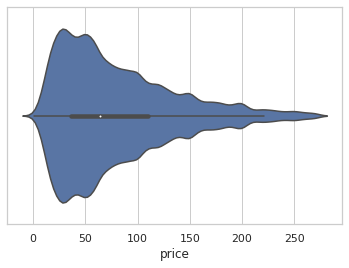

In [7]:
sns.set(style="whitegrid")
ax = sns.violinplot(x=df["price"])

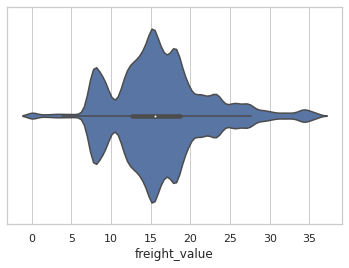

In [8]:
sns.set(style="whitegrid")
ax = sns.violinplot(x=df["freight_value"])

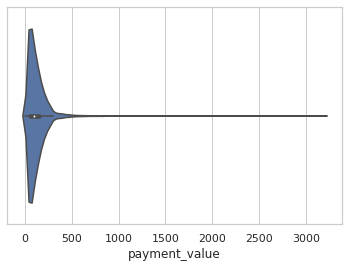

In [9]:
sns.set(style="whitegrid")
ax = sns.violinplot(x=df["payment_value"])

These could be free items with other purchases for an order

In [10]:
df[df['payment_value']==0].head(10)

,order_item_id,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
27701,1,56.99,14.15,3,3,1,0.0
43093,1,94.00,28.04,4,3,1,0.0
55184,1,59.00,15.16,4,3,1,0.0


In [11]:
# Consolidating the payment value of order item per payment type
item_payment_per_payment_type = df.groupby(by=['order_item_id','payment_type'], as_index=False)['payment_value'].sum().sort_values(by='payment_value', ascending=False)
item_payment_per_payment_type.columns = ['item_id', 'payment_type', "payment_value"]
item_payment_per_payment_type.head(10)

,item_id,payment_type,payment_value
0,1,1,7168142.94
1,1,2,1815039.58
4,2,1,1358685.40
8,3,1,440598.11
5,2,2,389491.08
2,1,3,243128.04
12,4,1,223789.21
9,3,2,168558.96
3,1,4,132283.31
16,5,1,115618.57


In [12]:
item_payment_per_payment_type.describe()

,item_id,payment_type,payment_value
count,55.000000,55.00000,5.500000e+01
mean,9.036364,2.00000,2.286938e+05
std,6.039879,1.01835,1.001701e+06
min,1.000000,1.00000,1.961100e+02
25%,4.000000,1.00000,2.202400e+03
50%,7.000000,2.00000,6.873290e+03
75%,14.000000,2.50000,3.437375e+04
max,21.000000,4.00000,7.168143e+06


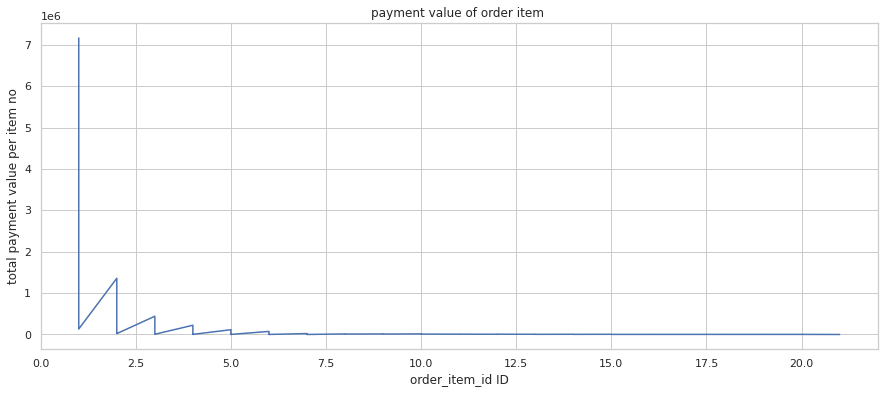

In [13]:
# Visualizing payment value of order item per payment type

vals = df.groupby(by=['order_item_id','payment_type'], as_index=False)['payment_value'].sum()

plt.subplots(figsize=(15,6))
plt.plot(vals.order_item_id, vals.payment_value)
plt.xlabel('order_item_id ID')
plt.ylabel('total payment value per item no')
plt.title('payment value of order item ')
plt.show()

In [14]:
# we can see that item id 1 has the highest payment value when combining all payment methods. least payment value is for item id 21

In [15]:
df.head()

,order_item_id,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,1,58.90,13.29,1,1,2,72.19
1,1,239.90,19.93,1,1,3,259.83
2,1,199.00,17.87,1,1,5,216.87
3,1,12.99,12.79,1,1,2,25.78
4,1,199.90,18.14,1,1,3,218.04


In [16]:
import matplotlib.pyplot as plt

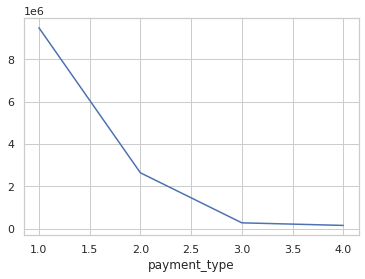

In [17]:
df.groupby('payment_type')['payment_value'].sum().plot()

In [18]:
# Payment type 1 has the highest payment value 

In [19]:
df.groupby('order_item_id')['payment_installments'].value_counts()

order_item_id  payment_installments
1              1                       47305
               2                       11145
               3                        9083
               4                        5952
               5                        4222
                                       ...  
19             4                           1
20             1                           1
               2                           1
               4                           1
21             2                           1
Name: payment_installments, Length: 178, dtype: int64

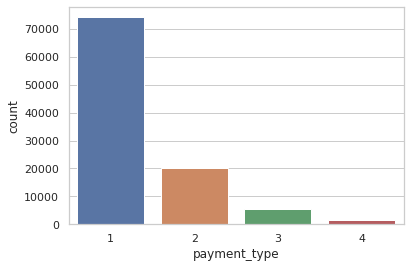

In [20]:
sns.countplot(x = df['payment_type'])
plt.show()

payment type 1 is the most popular

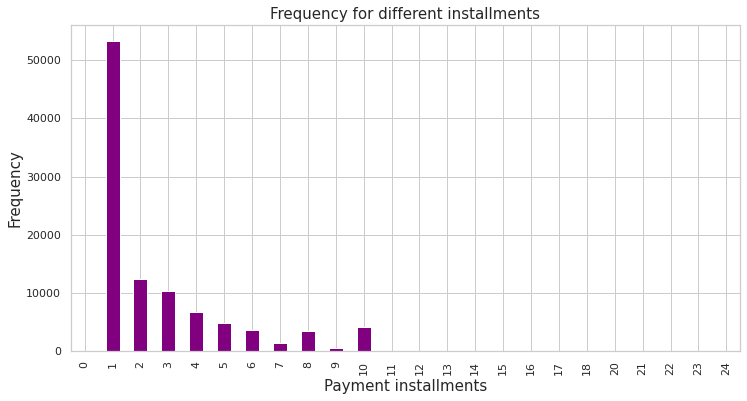

In [21]:
# Ploting the above data
ax = df['payment_installments'].value_counts().sort_index().plot(kind='bar',figsize=(12,6), color='purple')
ax.set_xlabel('Payment installments',fontsize=15)
ax.set_ylabel('Frequency',fontsize=15)
ax.set_title('Frequency for different installments',fontsize=15)
plt.show()

most of the payments are made in one installment

In [22]:
df.head()

,order_item_id,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,1,58.90,13.29,1,1,2,72.19
1,1,239.90,19.93,1,1,3,259.83
2,1,199.00,17.87,1,1,5,216.87
3,1,12.99,12.79,1,1,2,25.78
4,1,199.90,18.14,1,1,3,218.04


In [23]:
df.price.skew()

1.0853288244552386

In [24]:
df.freight_value.skew()

0.6437192970821187

In [25]:
df.payment_value.skew()

6.060628761006304

In [26]:
print(df["payment_value"].quantile(0.995))
print(df["payment_value"].mean())
print(df["payment_value"].median())

818.01
124.12450782058711
95.4


In [27]:
## So in order to remove or filter out our high value 'outliers' let's consider taking our data from the 99.5% percentile and exclude the bottom .25% and top 0.25% of prices
## This function returns the highest value of the 99.5% percentile which is still relatively high when compared to the mean and median

In [28]:
# Now we remove all prices over the 99.5% percentile (or in order words, we keep all data rows under the 99.5% value of 818.01)
df = df[df["payment_value"]<df["payment_value"].quantile(0.995)].reset_index(drop=True)

In [29]:
df.payment_value.skew()

2.3720319441515767

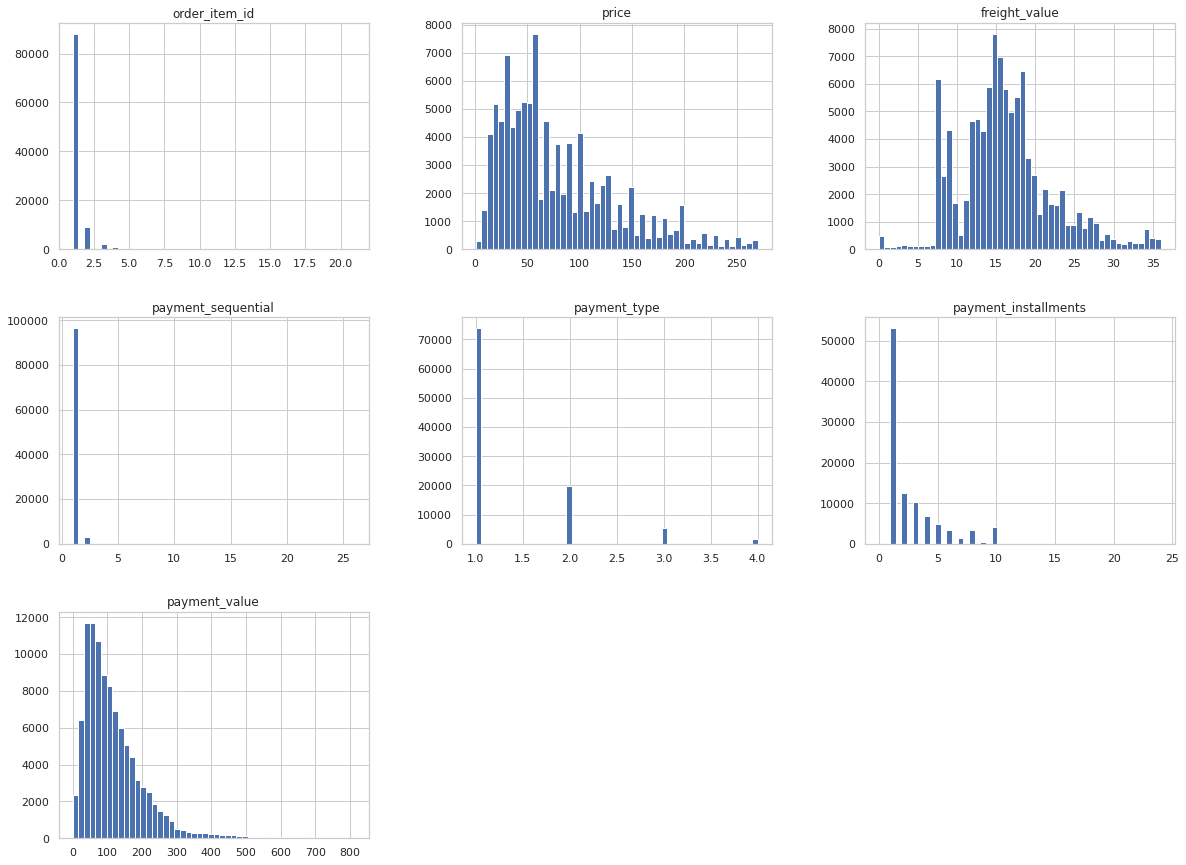

In [30]:
# Data Exploration - Let's explore 
%matplotlib inline
import matplotlib.pyplot as plt

try:
    # We select all rows and all columns after the 6th
    df.iloc[:,:].hist(bins=50, figsize=(20,15))
    plt.show()
except AttributeError:
    pass


payment value and price are still a little right skewed

#### Train test split

In [31]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [32]:
test_set.head()

,order_item_id,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
36718,1,93.0,18.99,1,1,4,111.99
40179,1,220.0,15.71,1,1,8,235.71
49898,3,7.8,3.08,1,1,10,129.37
6187,1,34.9,14.10,1,2,1,49.00
12080,1,129.0,26.18,1,1,5,155.18


In [33]:
df.payment_sequential.value_counts()

1     96555
2      2856
3       563
4       271
5       153
6       103
7        70
8        48
9        39
10       33
11       28
12       21
13       13
14       10
15        9
16        8
17        8
18        8
19        8
20        5
21        5
22        2
25        1
23        1
24        1
26        1
Name: payment_sequential, dtype: int64

In [34]:
df.payment_type.value_counts()

1    73854
2    19965
3     5499
4     1502
Name: payment_type, dtype: int64

In [35]:
df.payment_installments.value_counts()

1     53079
2     12455
3     10329
4      6778
5      4922
10     4040
6      3521
8      3375
7      1482
9       573
12      104
15       53
11       24
18       19
13       16
14       13
24        9
16        6
17        6
20        6
21        5
0         3
23        1
22        1
Name: payment_installments, dtype: int64

In [36]:
t = train_set.copy()

In [37]:
t.head()

,order_item_id,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
8344,1,56.99,15.15,1,1,3,72.14
35839,1,109.18,9.51,1,1,5,118.69
76532,1,53.90,21.35,1,2,1,75.25
40486,1,159.90,26.40,1,1,6,186.30
13938,1,69.90,14.66,1,1,2,84.56


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


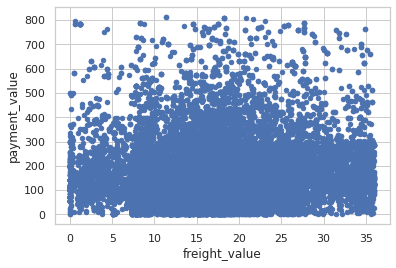

In [38]:
t.plot(kind="scatter", x="freight_value", y="payment_value")

Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

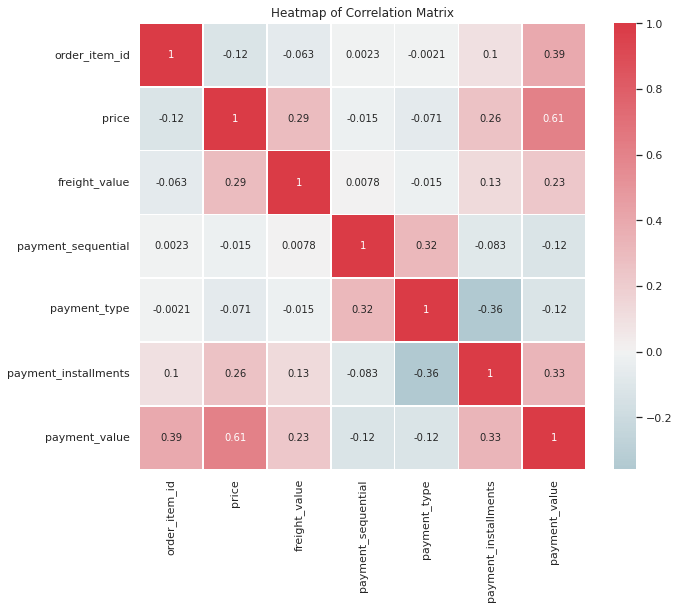

In [39]:
# Now let's explore our correlation matrix

corr_matrix = t.corr()

# Heatmap
plt.figure(figsize = (10,10))
cmap = sns.diverging_palette(220,10,as_cmap = True)

#Deep dive into diverging_pattern
sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns.values,
           yticklabels=corr_matrix.columns.values, cmap=cmap, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .82}, annot=True)
plt.title('Heatmap of Correlation Matrix')

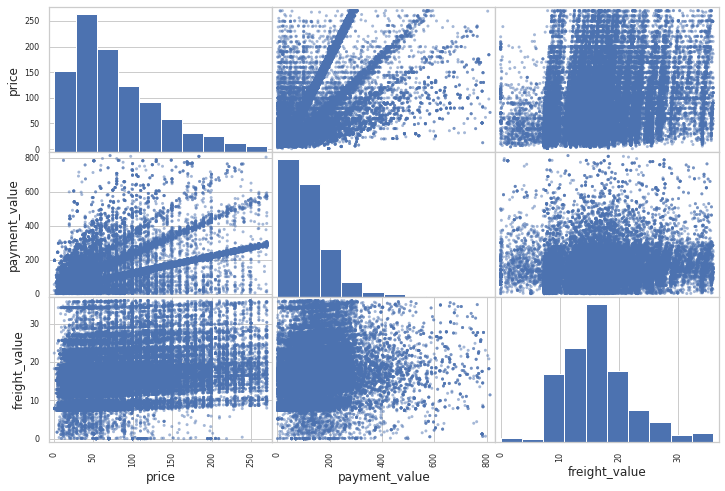

In [40]:
from pandas.plotting import scatter_matrix
attributes = ["price", "payment_value", "freight_value",]
scatter_matrix(t[attributes], figsize=(12, 8))
plt.show()

In [41]:
X_train = train_set.drop('payment_value', axis=1)

In [42]:
X_train.head()

,order_item_id,price,freight_value,payment_sequential,payment_type,payment_installments
8344,1,56.99,15.15,1,1,3
35839,1,109.18,9.51,1,1,5
76532,1,53.90,21.35,1,2,1
40486,1,159.90,26.40,1,1,6
13938,1,69.90,14.66,1,1,2


In [43]:
y_train=train_set['payment_value']

In [44]:
X_test=test_set.drop('payment_value', axis=1)

In [45]:
y_test=test_set['payment_value']

In [46]:
y_test.head()

36718    111.99
40179    235.71
49898    129.37
6187      49.00
12080    155.18
Name: payment_value, dtype: float64

In [47]:
X_train.dtypes

order_item_id             int64
price                   float64
freight_value           float64
payment_sequential        int64
payment_type              int64
payment_installments      int64
dtype: object

In [48]:
cols = ["order_item_id","payment_sequential","payment_type","payment_installments"]
X_num = X_train.drop(cols, axis=1)

In [49]:
X_num2=X_test.drop(cols, axis=1)

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
scaler = StandardScaler().fit(X_num.values)
features = scaler.transform(X_num.values)
features_test=scaler.transform(X_num2.values)

In [52]:
# X_num.head()

In [53]:
X_train['price']=features[:,0]
X_train['freight_value']=features[:,1]

In [54]:
X_test['price']=features_test[:,0]
X_test['freight_value']=features_test[:,1]

In [55]:
X_train.head()

,order_item_id,price,freight_value,payment_sequential,payment_type,payment_installments
8344,1,-0.402945,-0.162580,1,1,3
35839,1,0.530267,-1.114295,1,1,5
76532,1,-0.458197,0.883631,1,2,1
40486,1,1.437194,1.735787,1,1,6
13938,1,-0.172101,-0.245264,1,1,2


In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
import scipy as sp
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels
import statsmodels.api as sm

# Linear Regression

In [57]:
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [58]:
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred)) 
print("MSE: ", metrics.mean_squared_error(y_test, y_pred)) 

# rSquared
score = r2_score(y_test, y_pred)
print("R^2:", score)

RMSE:  60.299859203616606
MAE:  28.968309499882917
MSE:  3636.0730199759864
R^2: 0.6107162219346636


In [59]:
reg.score(X_train,y_train)

0.6203482161687671

In [60]:
reg.score(X_test,y_test)

0.6107162219346636

We can see that 60% of the data fit the regresssion mode and 60% of the variance is explained 

Adjusted R squared

In [61]:
1-(1-reg.score(X_test,y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6106003464240026

In [62]:
# Adjusted R squared is also 61% 

# KNN Regressor

In [63]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [64]:
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred)) 
print("MSE: ", metrics.mean_squared_error(y_test, y_pred)) 

# rSquared
score = r2_score(y_test, y_pred)
print("R^2:", score)

RMSE:  53.834798889398776
MAE:  24.83451299345368
MSE:  2898.1855714620115
R^2: 0.6897156293080635


In [65]:
# Accuracy
reg.score(X_train,y_train)

0.6203482161687671

In [66]:
# Accuracy of model with test set
reg.score(X_test,y_test)

0.6107162219346636

In [67]:
X_test.shape

(20164, 6)

In [68]:
y_pred.shape

(20164,)

In [69]:
# Adjusted R squared

In [70]:
1-(1-knn.score(X_test,y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6896232690250774

# Decision Tree

In [71]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [72]:
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred)) 
print("MSE: ", metrics.mean_squared_error(y_test, y_pred)) 

# rSquared
score = r2_score(y_test, y_pred)
print("R^2:", score)

RMSE:  67.27046390972204
MAE:  27.346978658686766
MSE:  4525.315314629215
R^2: 0.5155125232805633


In [73]:
# Accuracy of model with test set
dt.score(X_test,y_test)

0.5155125232805633

# XG Boost Regressor

In [74]:
xg = XGBRegressor()
xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)

[03:56:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [75]:
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred)) 
print("MSE: ", metrics.mean_squared_error(y_test, y_pred)) 

# rSquared
score = r2_score(y_test, y_pred)
print("R^2:", score)

RMSE:  50.26884227000126
MAE:  23.5582765043859
MSE:  2526.956503166265
R^2: 0.7294600055733117


In [76]:
# Accuracy of model with test set
xg.score(X_test,y_test)

0.7294600055733117

# Fine tuning the model 

In [77]:
X=pd.concat([X_train,X_test])
Y=pd.concat([y_train,y_test])

In [78]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(DecisionTreeRegressor(random_state=42),X , Y,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [79]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [66.01278871 67.45435331 67.49438823 68.29547506 65.23524602 65.99152516
 65.05034298 64.12288412 65.18027906 67.49210456]
Mean: 66.23293872048173
Standard deviation: 1.3032174021406142


In [80]:
lin_scores = cross_val_score(LinearRegression(), X, Y,
                             scoring="neg_mean_absolute_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [5.29492678 5.35483226 5.36969549 5.31395943 5.33357465 5.32975987
 5.28911851 5.3543432  5.364557   5.40970032]
Mean: 5.341446751740857
Standard deviation: 0.03491786554588634


In [81]:
# from sklearn.svm import SVR

# svm_reg = SVR(kernel="linear")
# svm_reg.fit( X, Y,)
# X_pred = svm_reg.predict(X)
# svm_mse = mean_squared_error(Y, X_pred)
# svm_rmse = np.sqrt(svm_mse)
# svm_rmse

In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit( X, Y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

Best hyperparameter combination found⏰

In [83]:
grid_search.best_params_

{'max_features': 2, 'n_estimators': 30}

In [84]:
grid_search.best_estimator_

RandomForestRegressor(max_features=2, n_estimators=30, random_state=42)

Let's look at the score of each hyperparameter combination tested during the grid search:



In [88]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)
    

56.43684761108835 {'max_features': 2, 'n_estimators': 3}
52.59899002413029 {'max_features': 2, 'n_estimators': 10}
51.40869768621015 {'max_features': 2, 'n_estimators': 30}
57.204015174884674 {'max_features': 4, 'n_estimators': 3}
53.41175937533519 {'max_features': 4, 'n_estimators': 10}
52.12698782187524 {'max_features': 4, 'n_estimators': 30}
57.807752873591966 {'max_features': 6, 'n_estimators': 3}
54.051098804558414 {'max_features': 6, 'n_estimators': 10}
52.752032651808626 {'max_features': 6, 'n_estimators': 30}
nan {'max_features': 8, 'n_estimators': 3}
nan {'max_features': 8, 'n_estimators': 10}
nan {'max_features': 8, 'n_estimators': 30}
58.062733058821735 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54.99495769826949 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
58.18735894945129 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
55.379912683200715 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
58.83723023560697 {'bootstrap': Fa

In [89]:
pd.DataFrame(grid_search.cv_results_).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.328856,0.023287,0.031118,0.002783,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-3081.234185,-3357.561826,-3194.634634,-3089.286079,-3202.872117,-3185.117768,100.118183,10,-958.078545,-952.767350,-944.302572,-938.364437,-924.226782,-943.547937,11.805772
1,1.018946,0.007197,0.090654,0.001833,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-2728.008074,-2848.351332,-2746.651186,-2680.234853,-2830.023312,-2766.653752,63.327739,3,-659.087834,-656.422310,-648.851404,-650.278845,-646.238704,-652.175819,4.810576
2,3.031002,0.019643,0.265023,0.004475,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2623.151114,-2714.108805,-2609.658703,-2552.139370,-2715.212997,-2642.854198,63.296678,1,-575.069018,-571.657856,-572.915981,-567.419174,-564.470977,-570.306601,3.839456
3,0.446682,0.003900,0.030040,0.000700,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3228.342588,-3299.239467,-3268.158485,-3211.201069,-3354.555152,-3272.299352,51.330557,11,-955.063309,-948.103597,-968.504748,-977.105305,-956.791246,-961.113641,10.343236
4,1.474115,0.024758,0.089663,0.000615,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2803.650140,-2930.905866,-2834.587497,-2757.332018,-2937.604676,-2852.816040,70.927988,5,-670.006103,-666.957035,-662.006585,-667.106276,-664.885465,-666.192293,2.653047


In [90]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.21711447, 0.50450508, 0.17871575, 0.02084064, 0.01586676,
       0.0629573 ])

In [92]:
feats = pd.DataFrame()
feats["Name"] = list(X.columns)
feats["Score"] = feature_importances

In [93]:
feats.sort_values("Score",ascending=False).round(5).head(20)

,Name,Score
1,price,0.50451
0,order_item_id,0.21711
2,freight_value,0.17872
5,payment_installments,0.06296
3,payment_sequential,0.02084
4,payment_type,0.01587


In [94]:
### Now we can test the out of sample performance. 

final_model = grid_search.best_estimator_

final_predictions = final_model.predict(X_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [95]:
final_rmse

24.43124529753239

In [96]:
final_mae = mean_absolute_error(y_test, final_predictions)

In [97]:
final_mae ## not too bad

10.77655035928864